# **LIBRIRIES**

In [2]:
        ## DADOS ##

import os
import cv2
import keras
import pickle
import random
import shutil
import librosa
import numpy as np
from PIL import Image
from librosa import display
import matplotlib.pyplot as plt

        ## NEURAL NETWORK ##

from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import ResNet50

# **AUDIOS**

#### **SONG**

In [ ]:
         ### CRIAR AS PASTAS NECESSÁRIAS!!! ###

classes_dir = ['neutral','calm','happy','sad','angry','fear','disgust','surprised','song', 'speech']


for category in classes_dir:
    if not os.path.isdir(category):
        os.makedirs(category)
        print("Pasta " + category + " foi criada!!")
    else:
        print("Pasta " + category + " já criada!!")

!unzip "/content/drive/MyDrive/PROJETOS/RAV_song.zip" -d "/content/song"  ## UNZIP AUDIOS

In [ ]:
path = "/content/song"
pathfiles = os.listdir(path)
for files in pathfiles:
    subfiles = os.path.join(path, files)
    audios = os.listdir(subfiles)
    for so in audios:
        files_song = os.path.join(subfiles, so)
        emo_label = files_song[30]
        if emo_label == '1':
            shutil.copy(files_song, "/content/neutral")
        if emo_label == '2':
            shutil.copy(files_song, "/content/calm")
        if emo_label == '3':
            shutil.copy(files_song, "/content/happy")
        if emo_label == '4':
            shutil.copy(files_song, "/content/sad")
        if emo_label == '5':
            shutil.copy(files_song, "/content/angry")
        if emo_label == '6':
            shutil.copy(files_song, "/content/fear")
        #if emo_label == '7':
            #shutil.copy(files_song, "/content/disgust")       ## NÃO TEM!!
        #if emo_label == '8':
            #shutil.copy(files_song, "/content/surprised")

#### **SPEECH**

In [ ]:
         ### CRIAR AS PASTAS NECESSÁRIAS!!! ###

classes_dir = ['neutral','calm','happy','sad','angry','fear','disgust','surprised','song', 'speech']


for category in classes_dir:
    if not os.path.isdir(category):
        os.makedirs(category)
        print("Pasta " + category + " foi criada!!")
    else:
        print("Pasta " + category + " já criada!!")

!unzip "/content/drive/MyDrive/PROJETOS/RAV_speech.zip" -d "/content/speech"  ## UNZIP AUDIOS

In [ ]:
path_speech = "/content/speech"
pathfiles_speech = os.listdir(path_speech)
for files_speech in pathfiles_speech:
    subfiles_speech = os.path.join(path_speech, files_speech)
    audios_speech = os.listdir(subfiles_speech)
    for so_speech in audios_speech:
        files_speech = os.path.join(subfiles_speech, so_speech)
        emo_label = files_speech[32]
        if emo_label == '1':
            shutil.copy(files_speech, "/content/neutral")
        if emo_label == '2':
            shutil.copy(files_speech, "/content/calm")
        if emo_label == '3':
            shutil.copy(files_speech, "/content/happy")
        if emo_label == '4':
            shutil.copy(files_speech, "/content/sad")
        if emo_label == '5':
            shutil.copy(files_speech, "/content/angry")
        if emo_label == '6':
            shutil.copy(files_speech, "/content/fear")
        if emo_label == '7':
            shutil.copy(files_speech, "/content/disgust")       
        if emo_label == '8':
            shutil.copy(files_speech, "/content/surprised")

In [ ]:
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")
shutil.copy(files_speech, "/content/neutral")

In [ ]:
!zip -r neutral.zip neutral/
!zip -r calm.zip calm/
!zip -r happy.zip happy/
!zip -r fear.zip fear/
!zip -r angry.zip angry/
!zip -r sad.zip sad/
!zip -r disgust.zip disgust/
!zip -r surprised.zip surprised/

In [ ]:
!cp neutral.zip "/content/drive/MyDrive/PROJETOS"
!cp calm.zip "/content/drive/MyDrive/PROJETOS"
!cp happy.zip "/content/drive/MyDrive/PROJETOS"
!cp fear.zip "/content/drive/MyDrive/PROJETOS"
!cp angry.zip "/content/drive/MyDrive/PROJETOS"
!cp sad.zip "/content/drive/MyDrive/PROJETOS"  
!cp disgust.zip "/content/drive/MyDrive/PROJETOS"
!cp surprised.zip "/content/drive/MyDrive/PROJETOS"

## SALVO!!! NÃO PRECISA CORRER MAIS O CÓDIGO ACIMA...

# **MEL_SPECTOGRAMA**

In [ ]:
!mkdir "/content/emo_audios"

!unzip "/content/drive/MyDrive/PROJETOS/neutral.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/calm.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/happy.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/fear.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/angry.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/sad.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/disgust.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS
!unzip "/content/drive/MyDrive/PROJETOS/surprised.zip" -d "/content/emo_audios"  ## UNZIP AUDIOS


In [ ]:
classes = ['neutral','calm','happy','sad','angry','fear','disgust','surprised']
DATADIR = "/content/emo_audios"
data = []

for category in classes:
    path = os.path.join(DATADIR, category)
    label = classes.index(category)
    files = os.listdir(path)
    #print(path)
    for audios in files:
        #name = audios[:-4]
        aud = os.path.join(path, audios)
        X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
        mel_spec = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels= 320)
        mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40
        img = cv2.resize(mel_db,(100,100))
        img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        image = img.reshape(100,100,3)
        data.append([image, label])
        #break  ## Para ler um audio de cada emoção e testar abaixo
    #break  ## Para ler um audio apenas

In [ ]:
image.shape

(100, 100, 3)

In [ ]:
random.shuffle(data)

In [ ]:
data[60]

In [ ]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X_train = np.array(X)
y_train = np.array(y)
len(X_train)

2452

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2452, 100, 100, 3)
(2452,)


In [ ]:
X_train.shape # (,100,100,3) (quantidade de imagens, tamanho, tamanho, 1 ou 3)

(2452, 100, 100, 3)

#### **SAVE AND COPY**

In [ ]:
pickle.dump(X_train, open('data_train.pkl', 'wb'))
pickle.dump(y_train, open('labels_train.pkl', 'wb'))

# Salvos os dados processados

In [ ]:
!cp data_train.pkl '/content/drive/MyDrive/PROJETOS'
!cp labels_train.pkl '/content/drive/MyDrive/PROJETOS' 

# Copiados os dados processados no Drive, eles podem ser apenas carregados a partir daqui com Pickle;

#### **LOAD DATA WITH PICKLE**

In [ ]:
!cp /content/drive/MyDrive/PROJETOS/data_train.pkl '/content' 
!cp /content/drive/MyDrive/PROJETOS/labels_train.pkl '/content'  

In [ ]:
X_train = pickle.load(open('data_train.pkl', 'rb'))
y_train = pickle.load(open('labels_train.pkl', 'rb'))

# **NEURAL NETWORK**

In [ ]:
models = VGG19(input_shape=X_train.shape[1:], weights='imagenet', include_top=False) 

In [ ]:
models.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_5')>

In [ ]:
for layer in models.layers: 
  layer.trainable = False

In [ ]:
x = Flatten()(models.output) 
prediction = Dense(8, activation='softmax')(x)
model = Model(inputs=models.input, outputs=prediction)
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=8, epochs = 50, validation_split=0.25)

Epoch 1/50
230/230 [==============================] - 7s 28ms/step - loss: 1.6909 - accuracy: 0.3524 - val_loss: 1.4413 - val_accuracy: 0.4437
Epoch 2/50
230/230 [==============================] - 6s 27ms/step - loss: 1.3222 - accuracy: 0.5014 - val_loss: 1.3362 - val_accuracy: 0.4976
Epoch 3/50
230/230 [==============================] - 6s 27ms/step - loss: 1.1848 - accuracy: 0.5606 - val_loss: 1.2949 - val_accuracy: 0.5204
Epoch 4/50
230/230 [==============================] - 6s 27ms/step - loss: 1.0760 - accuracy: 0.6030 - val_loss: 1.2364 - val_accuracy: 0.5400
Epoch 5/50
230/230 [==============================] - 6s 27ms/step - loss: 1.0058 - accuracy: 0.6465 - val_loss: 1.3292 - val_accuracy: 0.5139
Epoch 6/50
230/230 [==============================] - 6s 27ms/step - loss: 0.9224 - accuracy: 0.6721 - val_loss: 1.2808 - val_accuracy: 0.5188
Epoch 7/50
230/230 [==============================] - 6s 27ms/step - loss: 0.8920 - accuracy: 0.6683 - val_loss: 1.1518 - val_accuracy: 0.5742

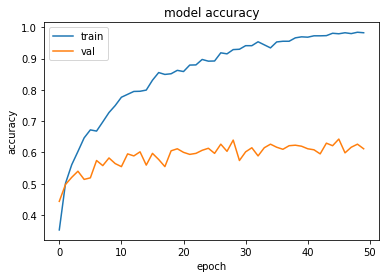

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

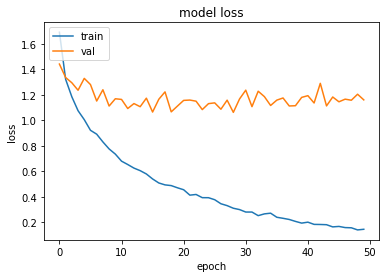

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
IMG_SIZE = 100
classes = ['neutral','calm','happy','sad','angry','fear','disgust','surprised']
aud = '/content/surprised.ogg'

X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
mel_spec = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels= 320)
mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40
img = cv2.resize(mel_db,(100,100))
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
image = img.reshape(-1,100,100,3)
prediction = model.predict(image)
label = classes[np.argmax(prediction)]
print(label)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


1/1 [==============================] - 0s 54ms/step
surprised


In [ ]:
import tensorflow as tf
IMG_SIZE = 100
classes = ['neutral','happy','sad','angry','fear']
#aud = '/content/TESTE_MODEL/angry/OAF_back_angry.wav'
#aud = "/content/TESTE_MODEL/fear/OAF_back_fear.wav"
aud = "D:\speech_emotion\happy.ogg"

model = tf.keras.models.load_model('D:\speech_emotion\Audio_model.h5')
#classes = ['neutral','happy','sad','angry','fear']

X, sample_rate = librosa.load(aud, res_type='kaiser_fast')
mel_spec = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels= 320)
mel_db = (librosa.power_to_db(mel_spec, ref=np.max) + 40)/40
img = cv2.resize(mel_db,(100,100))
img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
image = img.reshape(-1,100,100,3)
prediction = model.predict(image)
label = classes[np.argmax(prediction)]
print(label)

In [ ]:
model.save('Audio_model.h5')
!cp Audio_model.h5 '/content/drive/MyDrive/PROJETOS'
print("MODEL SAVED")

MODEL SAVED
